# Problem 1:

## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Dataset for Problem: Election_Data.xlsx

## Data Ingestion: 11 marks
## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)
## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

## Data Preparation: 4 marks
## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

## Modeling: 22 marks
## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
## 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)


## Inference: 5 marks
## 1.8 Based on these predictions, what are the insights? (5 marks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
os.getcwd()

'C:\\Users\\Rhea\\Downloads'

In [3]:
df= pd.read_excel("Election_Data.xlsx", sheet_name='Election_Dataset_Two Classes')

In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [6]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [7]:
df.tail()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male
1524,Conservative,74,2,3,2,4,11,0,female


In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(1525, 9)

In [10]:
df.isna().values.any()

False

In [11]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [12]:
dup= df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 8


In [13]:
df[dup]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [14]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




[Text(0.5, 1.0, 'KNOWLEDGE OF PARTIES')]

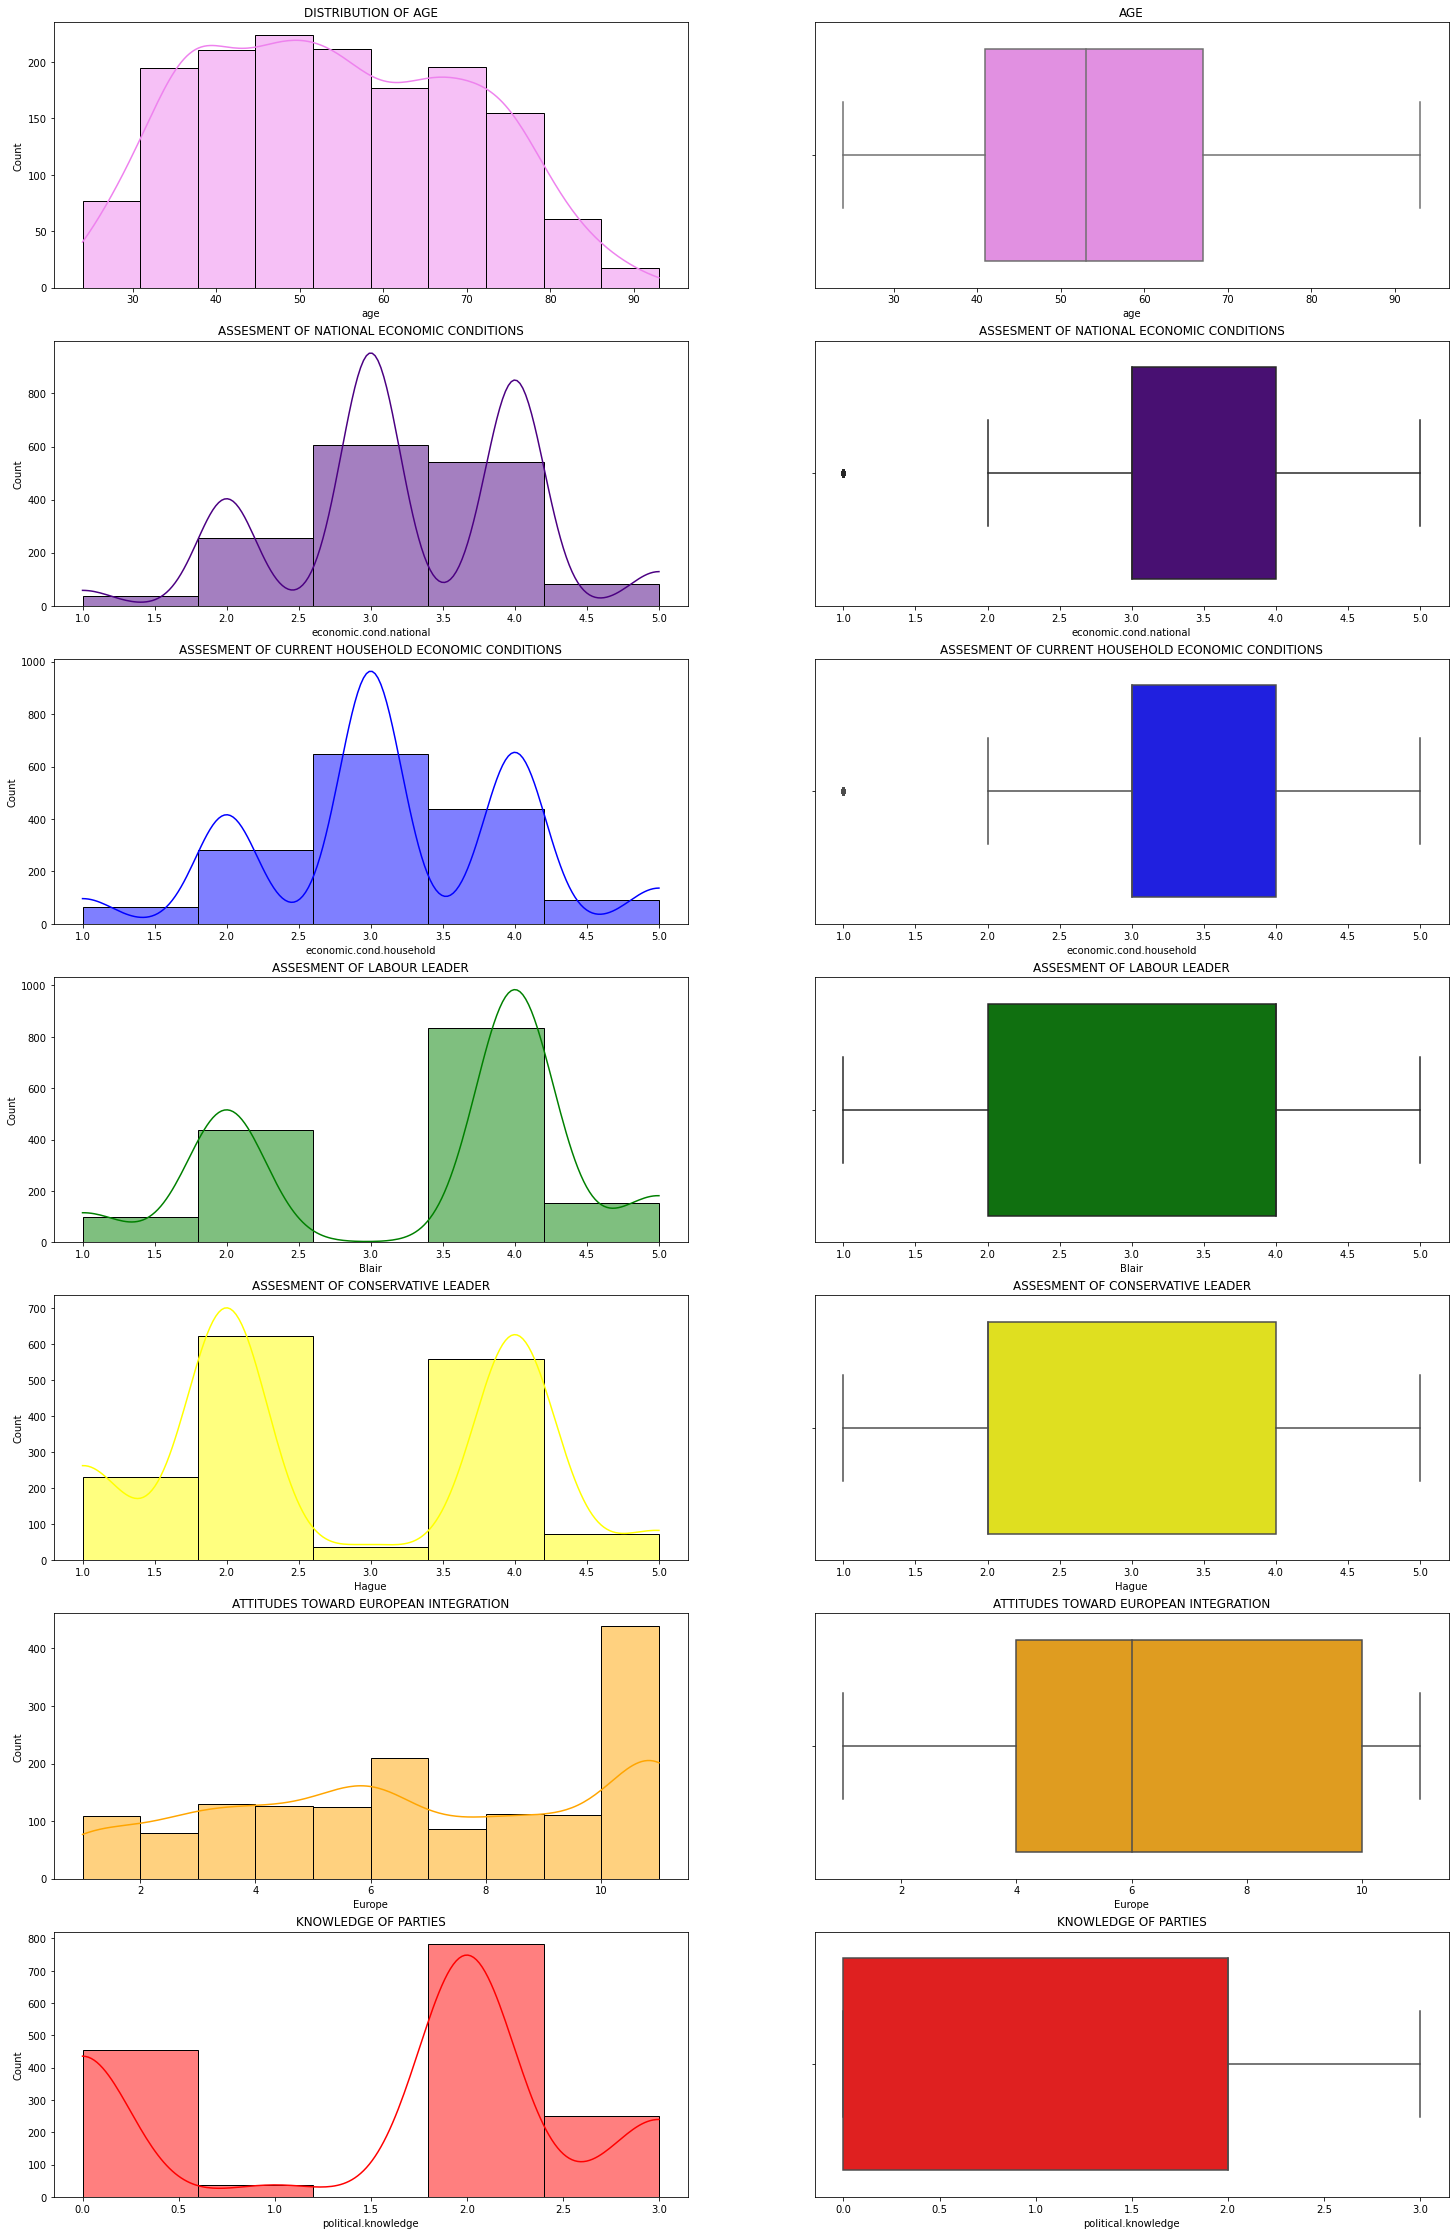

In [15]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(25,40)
sns.histplot(df['age'], kde=True,color='violet', ax=axes[0][0],bins=10).set(title='DISTRIBUTION OF AGE')
sns.boxplot(x='age', data= df,color='violet', ax=axes[0][1]).set(title='AGE')
sns.histplot(df['economic.cond.national'], kde=True,color='indigo', ax=axes[1][0],bins=5).set(title='ASSESMENT OF NATIONAL ECONOMIC CONDITIONS')
sns.boxplot(x='economic.cond.national', data=df,color='indigo', ax=axes[1][1]).set(title='ASSESMENT OF NATIONAL ECONOMIC CONDITIONS')
sns.histplot(df['economic.cond.household'], kde=True,color='blue', ax=axes[2][0],bins=5).set(title='ASSESMENT OF CURRENT HOUSEHOLD ECONOMIC CONDITIONS')
sns.boxplot(x='economic.cond.household', data=df,color='blue', ax=axes[2][1]).set(title='ASSESMENT OF CURRENT HOUSEHOLD ECONOMIC CONDITIONS')
sns.histplot(df['Blair'], kde=True,color='green', ax=axes[3][0],bins=5).set(title='ASSESMENT OF LABOUR LEADER')
sns.boxplot(x='Blair', data=df,color='green', ax=axes[3][1]).set(title='ASSESMENT OF LABOUR LEADER')
sns.histplot(df['Hague'], kde=True,color='yellow', ax=axes[4][0],bins=5).set(title='ASSESMENT OF CONSERVATIVE LEADER')
sns.boxplot(x='Hague', data=df,color='yellow', ax=axes[4][1]).set(title='ASSESMENT OF CONSERVATIVE LEADER')
sns.histplot(df['Europe'], kde=True,color='orange', ax=axes[5][0],bins=10).set(title='ATTITUDES TOWARD EUROPEAN INTEGRATION')
sns.boxplot(x='Europe', data=df,color='orange', ax=axes[5][1]).set(title='ATTITUDES TOWARD EUROPEAN INTEGRATION')
sns.histplot(df['political.knowledge'], kde=True,color='red', ax=axes[6][0],bins=5).set(title='KNOWLEDGE OF PARTIES')
sns.boxplot(x='political.knowledge', data=df,color='red', ax=axes[6][1]).set(title='KNOWLEDGE OF PARTIES')

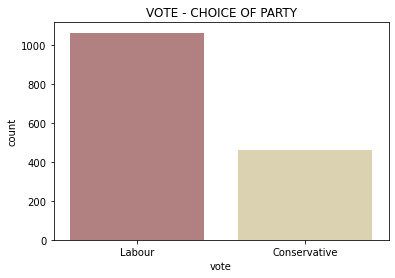

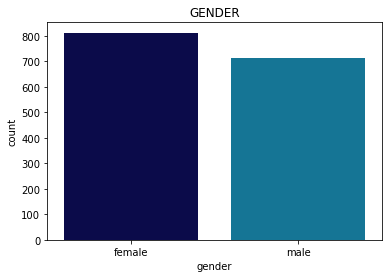

In [16]:
sns.countplot('vote',data = df, palette='pink',order = df['vote'].value_counts().index)
plt.title('VOTE - CHOICE OF PARTY')
plt.show()
sns.countplot('gender',data = df, palette='ocean',order = df['gender'].value_counts().index)
plt.title('GENDER')
plt.show()

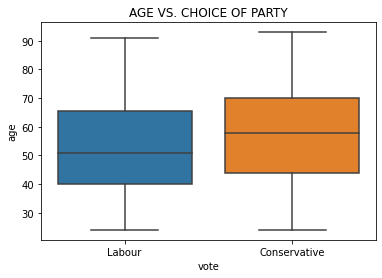

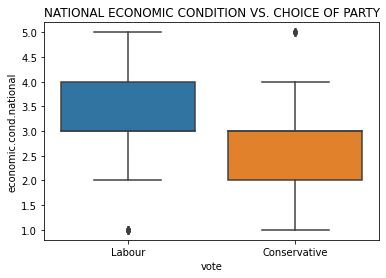

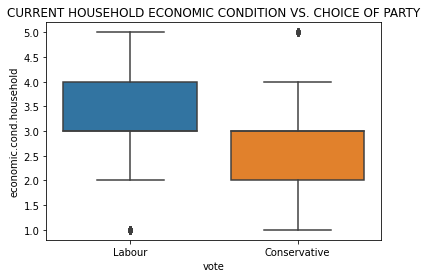

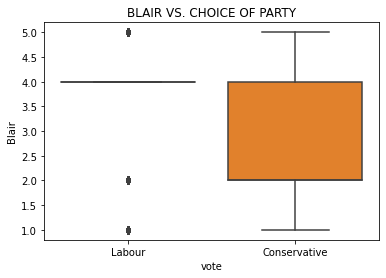

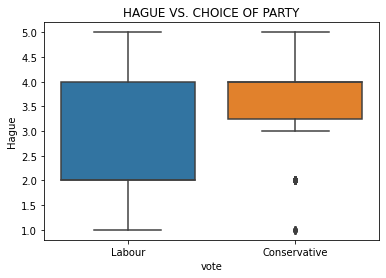

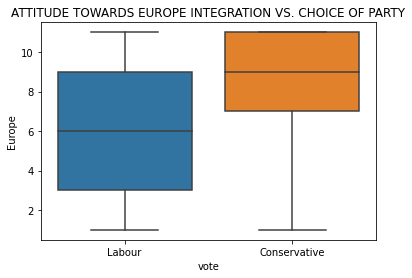

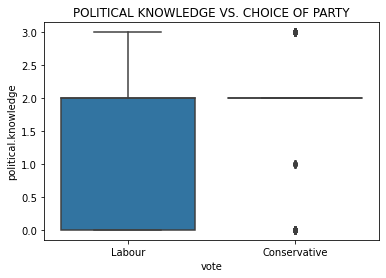

In [17]:
sns.boxplot(x='vote',y='age',data=df)
plt.title('AGE VS. CHOICE OF PARTY')
plt.show()
sns.boxplot(x='vote',y='economic.cond.national',data=df)
plt.title('NATIONAL ECONOMIC CONDITION VS. CHOICE OF PARTY')
plt.show()
sns.boxplot(x='vote',y='economic.cond.household',data=df)
plt.title('CURRENT HOUSEHOLD ECONOMIC CONDITION VS. CHOICE OF PARTY')
plt.show()
sns.boxplot(x='vote',y='Blair',data=df)
plt.title('BLAIR VS. CHOICE OF PARTY')
plt.show()
sns.boxplot(x='vote',y='Hague',data=df)
plt.title('HAGUE VS. CHOICE OF PARTY')
plt.show()
sns.boxplot(x='vote',y='Europe',data=df)
plt.title('ATTITUDE TOWARDS EUROPE INTEGRATION VS. CHOICE OF PARTY')
plt.show()
sns.boxplot(x='vote',y='political.knowledge',data=df)
plt.title('POLITICAL KNOWLEDGE VS. CHOICE OF PARTY')
plt.show()

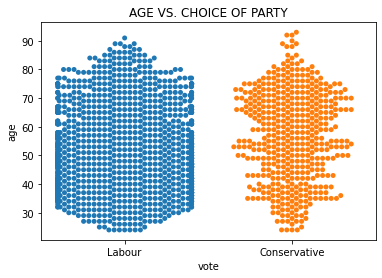

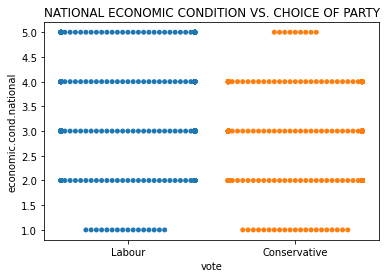

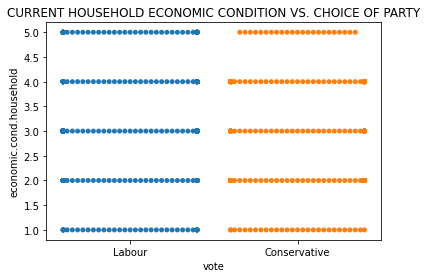

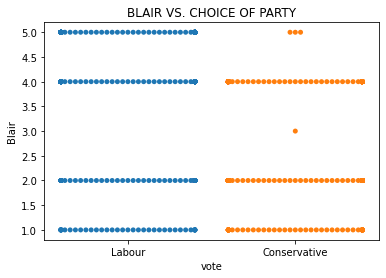

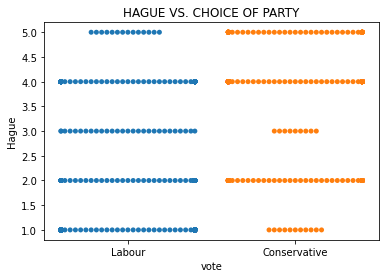

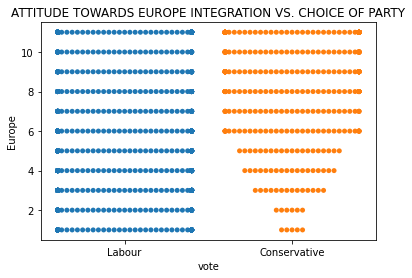

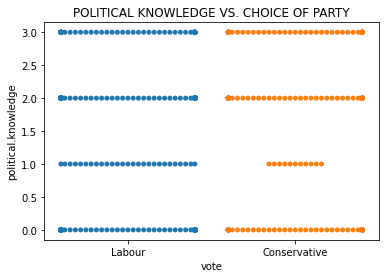

In [18]:
sns.swarmplot(x='vote',y='age',data=df)
plt.title('AGE VS. CHOICE OF PARTY')
plt.show()
sns.swarmplot(x='vote',y='economic.cond.national',data=df)
plt.title('NATIONAL ECONOMIC CONDITION VS. CHOICE OF PARTY')
plt.show()
sns.swarmplot(x='vote',y='economic.cond.household',data=df)
plt.title('CURRENT HOUSEHOLD ECONOMIC CONDITION VS. CHOICE OF PARTY')
plt.show()
sns.swarmplot(x='vote',y='Blair',data=df)
plt.title('BLAIR VS. CHOICE OF PARTY')
plt.show()
sns.swarmplot(x='vote',y='Hague',data=df)
plt.title('HAGUE VS. CHOICE OF PARTY')
plt.show()
sns.swarmplot(x='vote',y='Europe',data=df)
plt.title('ATTITUDE TOWARDS EUROPE INTEGRATION VS. CHOICE OF PARTY')
plt.show()
sns.swarmplot(x='vote',y='political.knowledge',data=df)
plt.title('POLITICAL KNOWLEDGE VS. CHOICE OF PARTY')
plt.show()

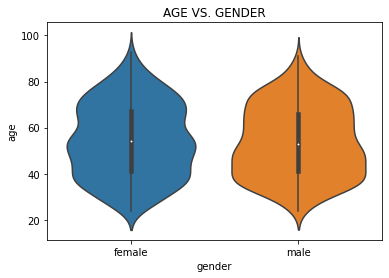

In [19]:
sns.violinplot(x='gender',y='age',data=df)
plt.title('AGE VS. GENDER')
plt.show()

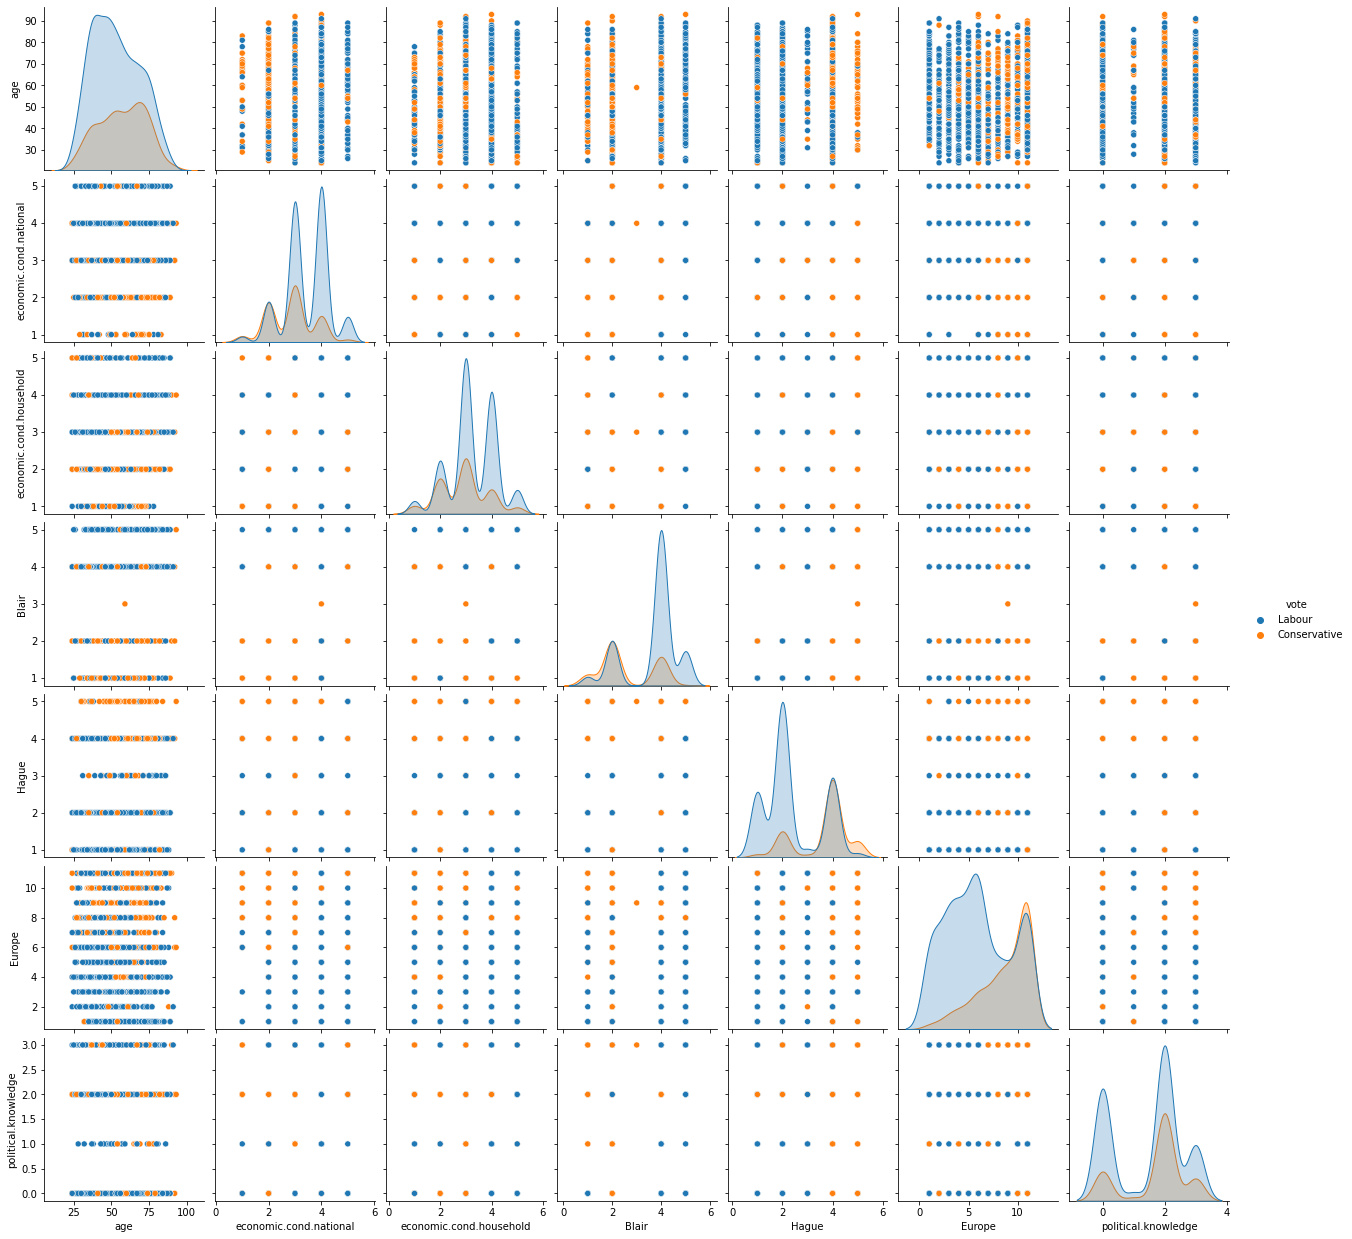

In [20]:
sns.pairplot(df, hue='vote')

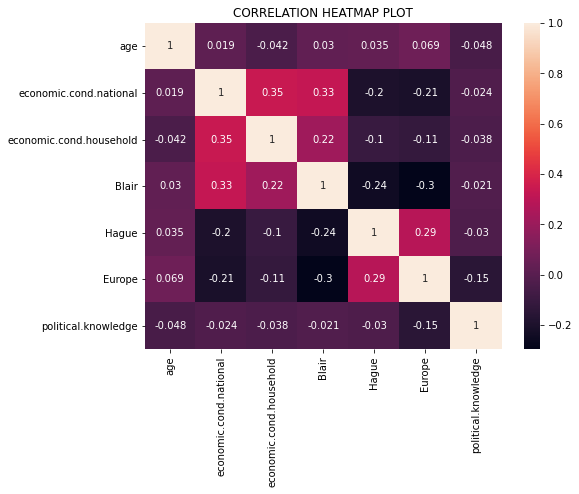

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2g")
plt.title('CORRELATION HEATMAP PLOT')
plt.show()

In [22]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1525, 9)
After (1517, 9)


In [23]:
dup= df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [24]:
import scipy.stats as stats
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
import statistics as st
from scipy.stats import pearsonr

In [25]:
def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def percent_outlier(_series):
    counter = 0
    lb = np.percentile(_series,.25) - (1.5*iqr(_series))
    ub = np.percentile(_series,.75) + (1.5*iqr(_series))
    for val in _series:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

stat_list = ['TOTAL RECORDS',
 'ZERO COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           zero_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           np.percentile(_series,.5),
           _series.mode()[0],
           st.variance(_series),
           st.stdev(_series),
           np.percentile(_series,.25),
           np.percentile(_series,.75),
           iqr(_series),
           stats.skew(_series),
           stats.kurtosis(_series)]
          ]

def stat_df(gem_df, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(gem_df[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

# Finding % Outliers in our Data
def outlier_percentage_df(gem_df, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(gem_df[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [26]:
categorical_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print(categorical_features) 
print(numerical_features)

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [27]:
stat_df(df, numerical_features).T

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
TOTAL RECORDS,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00,1517.00
ZERO COUNT,0.00,0.00,0.00,0.00,0.00,0.00,454.00
MIN,24.00,1.00,1.00,1.00,1.00,1.00,0.00
MAX,93.00,5.00,5.00,5.00,5.00,11.00,3.00
RANGE,69.00,4.00,4.00,4.00,4.00,10.00,3.00
MEAN,54.24,3.25,3.14,3.34,2.75,6.74,1.54
MEDIAN,24.00,1.00,1.00,1.00,1.00,1.00,0.00
MODE,37.00,3.00,3.00,4.00,2.00,11.00,2.00
VARIANCE,246.54,0.78,0.87,1.38,1.52,10.88,1.18
STD DEV,15.70,0.88,0.93,1.17,1.23,3.30,1.08


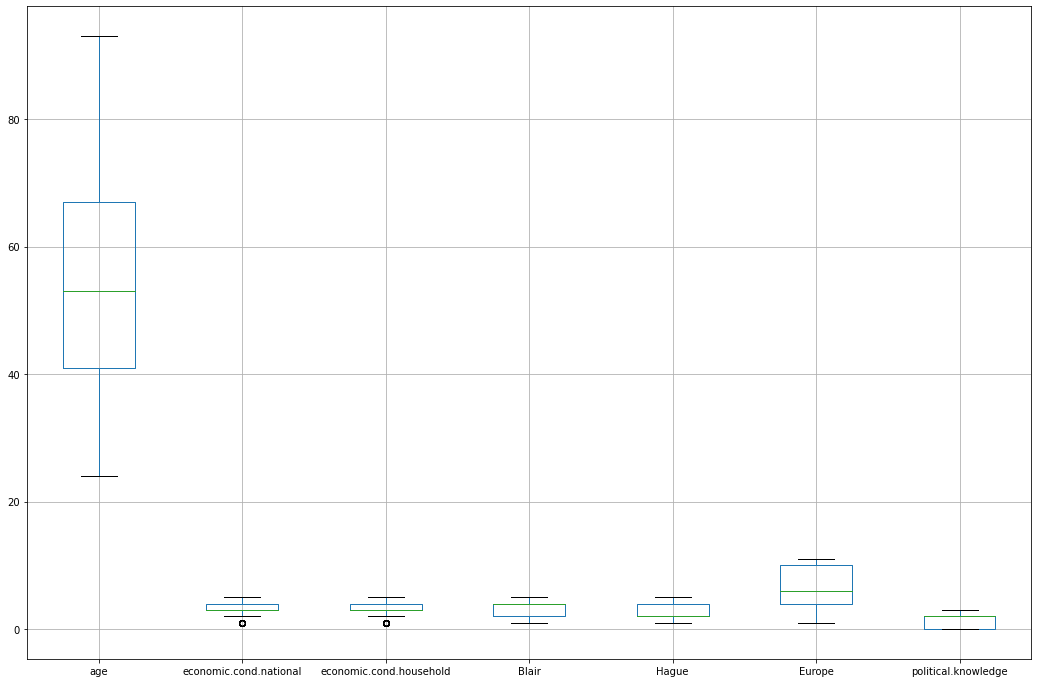

In [28]:
plt.figure(figsize=(18,12))
df.boxplot()
plt.show()

In [29]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


feature: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [30]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [31]:
df.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from scipy.stats import zscore

In [33]:
X=df.drop("vote",axis=1)
y=df["vote"]

In [34]:
X.apply(zscore) #train test check

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536
...,...,...,...,...,...,...,...,...
1520,0.812836,1.990670,-0.148020,-1.137217,1.014951,1.291625,1.346290,1.067536
1521,1.195085,-1.412613,-1.222408,0.565802,1.014951,0.381971,0.423832,1.067536
1522,-1.098410,-0.278185,-0.148020,1.417312,1.014951,-1.437338,0.423832,1.067536
1523,0.430587,-0.278185,-0.148020,-1.988727,1.014951,1.291625,0.423832,1.067536


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=11 ,stratify=df['vote'])

In [36]:
X.shape

(1517, 8)

In [37]:
y_train.value_counts()

1    739
0    322
Name: vote, dtype: int64

In [38]:
y_train.value_counts(1)

1    0.696513
0    0.303487
Name: vote, dtype: float64

In [39]:
y_test.value_counts()

1    318
0    138
Name: vote, dtype: int64

In [40]:
y_test.value_counts(1)

1    0.697368
0    0.302632
Name: vote, dtype: float64

In [41]:
logistic_model = LogisticRegression(max_iter=10000,n_jobs=2)

In [42]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [43]:
grid_search = GridSearchCV(estimator = logistic_model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [45]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [46]:
best_logistic_model = grid_search.best_estimator_

In [47]:
ytrain_predict = best_logistic_model.predict(X_train)
ytest_predict = best_logistic_model.predict(X_test)

In [48]:
ytest_predict_prob=best_logistic_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.245292,0.754708
1,0.527172,0.472828
2,0.077299,0.922701
3,0.846894,0.153106
4,0.064530,0.935470


In [49]:
best_logistic_model.score(X_train, y_train)

0.8378887841658812

In [50]:
best_logistic_model.score(X_test, y_test)

0.8223684210526315

AUC: 0.890


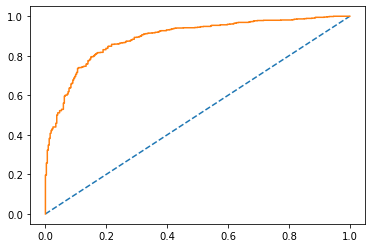

In [51]:
log_probs = best_logistic_model.predict_proba(X_train)
log_probs = log_probs[:, 1]
auc = roc_auc_score(y_train, log_probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, log_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

AUC: 0.885


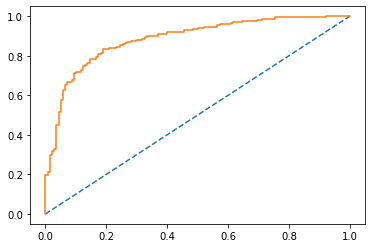

In [52]:
log_probs = best_logistic_model.predict_proba(X_test)
log_probs = log_probs[:, 1]
auc = roc_auc_score(y_test, log_probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, log_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [53]:
confusion_matrix(y_train, ytrain_predict)

array([[215, 107],
       [ 65, 674]], dtype=int64)

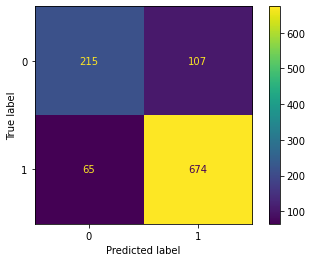

In [54]:
plot_confusion_matrix(best_logistic_model,X_train,y_train);

In [55]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71       322
           1       0.86      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



In [56]:
confusion_matrix(y_test, ytest_predict)

array([[ 95,  43],
       [ 38, 280]], dtype=int64)

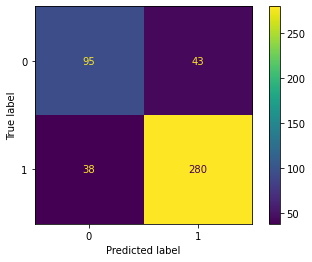

In [57]:
plot_confusion_matrix(best_logistic_model,X_test,y_test);

In [58]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       138
           1       0.87      0.88      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [60]:
lda_model = LinearDiscriminantAnalysis(shrinkage='auto')

In [61]:
grid1={'solver':['svd', 'lsqr', 'eigen'],
      'tol':[0.0001,0.00001]}

In [62]:
grid_search1 = GridSearchCV(estimator = lda_model, param_grid = grid1, cv = 3,n_jobs=-1,scoring='f1')

In [63]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(shrinkage='auto'),
             n_jobs=-1,
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [64]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'solver': 'lsqr', 'tol': 0.0001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


In [65]:
best_lda_model = grid_search1.best_estimator_

In [66]:
ytest_predict_prob=best_lda_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.191459,0.808541
1,0.589384,0.410616
2,0.046000,0.954000
3,0.914052,0.085948
4,0.057946,0.942054


In [67]:
best_lda_model.score(X_train, y_train)

0.8331762488218661

In [68]:
best_lda_model.score(X_test, y_test)

0.831140350877193

In [69]:
pred_class_train = best_lda_model.predict(X_train)

pred_class_test = best_lda_model.predict(X_test)

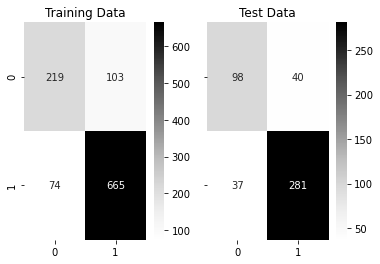

In [70]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [71]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.75      0.68      0.71       322
           1       0.87      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.73      0.71      0.72       138
           1       0.88      0.88      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456
 



In [72]:
pred_prob_train1 = best_lda_model.predict_proba(X_train)

pred_prob_test1 = best_lda_model.predict_proba(X_test)

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


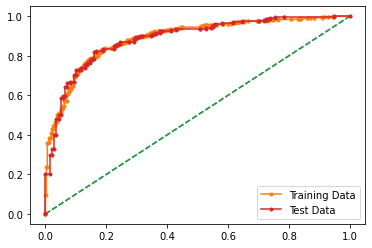

In [73]:
auc = metrics.roc_auc_score(y_train,pred_prob_train1[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test1[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [74]:
from sklearn.naive_bayes import GaussianNB 

In [75]:
GB_model = GaussianNB()
GB_model.fit(X_train, y_train.ravel())

GaussianNB()

In [76]:
ytrain_predict1 = GB_model.predict(X_train)
ytest_predict1 = GB_model.predict(X_test)

In [77]:
GB_model.score(X_train, y_train)

0.8303487276154571

In [78]:
GB_model.score(X_test, y_test)

0.8201754385964912

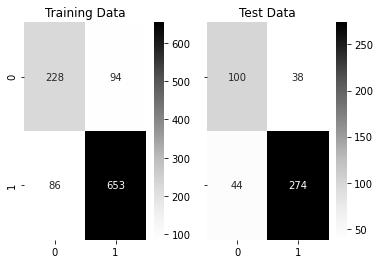

In [79]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [80]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict1),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict1),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.73      0.71      0.72       322
           1       0.87      0.88      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.80      0.80      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.69      0.72      0.71       138
           1       0.88      0.86      0.87       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456
 



In [81]:
pred_prob_train2 = GB_model.predict_proba(X_train)

pred_prob_test2 = GB_model.predict_proba(X_test)

AUC for the Training Data: 0.888
AUC for the Test Data: 0.877


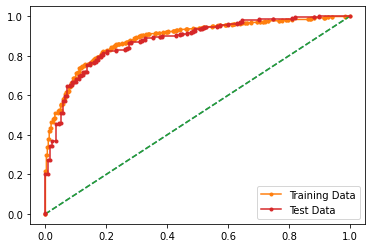

In [82]:
auc = metrics.roc_auc_score(y_train,pred_prob_train2[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test2[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test2[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [83]:
from sklearn.neighbors import KNeighborsClassifier #check with k value of 5 7 9

In [84]:
KNN = KNeighborsClassifier(n_jobs=2)

In [85]:
grid2={'n_neighbors':[5,7,9],
      'weights':['uniform', 'distance'],
      'leaf_size':[30,32,34,36],
      'metric':['minkowski','euclidean','manhattan'],}

In [86]:
grid_search2 = GridSearchCV(estimator = KNN, param_grid = grid2, cv = 3,n_jobs=-1,scoring='f1')

In [87]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=2), n_jobs=-1,
             param_grid={'leaf_size': [30, 32, 34, 36],
                         'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [88]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'leaf_size': 30, 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'} 

KNeighborsClassifier(metric='manhattan', n_jobs=2, n_neighbors=9)


In [89]:
best_KNN_model = grid_search2.best_estimator_

In [90]:
ytest_predict_prob1=best_KNN_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.111111,0.888889
1,0.555556,0.444444
2,0.000000,1.000000
3,1.000000,0.000000
4,0.000000,1.000000


In [91]:
best_KNN_model.score(X_train, y_train)

0.8303487276154571

In [92]:
best_KNN_model.score(X_test, y_test)

0.8048245614035088

In [93]:
pred_class_train1 = best_KNN_model.predict(X_train)

pred_class_test1 = best_KNN_model.predict(X_test)

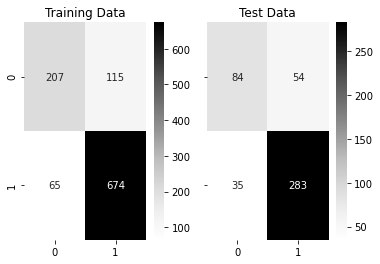

In [94]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test1)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [95]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train1),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test1),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.76      0.64      0.70       322
           1       0.85      0.91      0.88       739

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.71      0.61      0.65       138
           1       0.84      0.89      0.86       318

    accuracy                           0.80       456
   macro avg       0.77      0.75      0.76       456
weighted avg       0.80      0.80      0.80       456
 



In [96]:
pred_prob_train3 = best_KNN_model.predict_proba(X_train)

pred_prob_test3 = best_KNN_model.predict_proba(X_test)

AUC for the Training Data: 0.912
AUC for the Test Data: 0.848


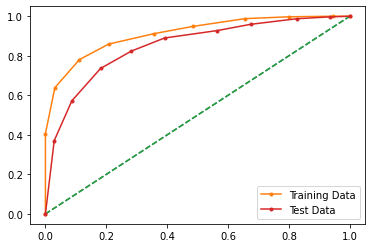

In [97]:
auc = metrics.roc_auc_score(y_train,pred_prob_train3[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train3[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test3[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test3[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [98]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfcl = RandomForestClassifier()
param_grid = {
    'max_depth': [5,7,10],
    'max_features': [3,4,5],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [51,101,301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3, n_jobs=-2)


In [100]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-2,
             param_grid={'max_depth': [5, 7, 10], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [150, 300],
                         'n_estimators': [51, 101, 301, 501]})

In [101]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 501}

In [102]:
best_grid_rfcl = grid_search.best_estimator_

In [103]:
Bagging_model=BaggingClassifier(base_estimator=best_grid_rfcl, random_state=1)
Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=5,
                                                        max_features=4,
                                                        min_samples_leaf=50,
                                                        min_samples_split=150,
                                                        n_estimators=501),
                  random_state=1)

In [104]:
y_train_predict3=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict3))
print(metrics.classification_report(y_train,y_train_predict3))

0.7898209236569275
[[129 193]
 [ 30 709]]
              precision    recall  f1-score   support

           0       0.81      0.40      0.54       322
           1       0.79      0.96      0.86       739

    accuracy                           0.79      1061
   macro avg       0.80      0.68      0.70      1061
weighted avg       0.79      0.79      0.76      1061



In [105]:
y_test_predict3=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict3))
print(metrics.classification_report(y_test,y_test_predict3))

0.7982456140350878
[[ 59  79]
 [ 13 305]]
              precision    recall  f1-score   support

           0       0.82      0.43      0.56       138
           1       0.79      0.96      0.87       318

    accuracy                           0.80       456
   macro avg       0.81      0.69      0.72       456
weighted avg       0.80      0.80      0.78       456



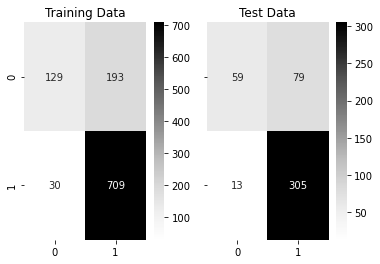

In [106]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict3)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict3)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [107]:
pred_prob_train4 = Bagging_model.predict_proba(X_train)

pred_prob_test4 = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 0.891
AUC for the Test Data: 0.869


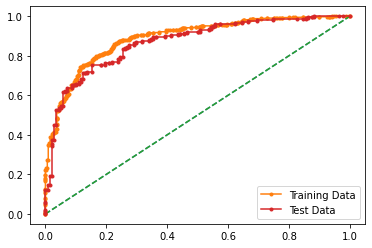

In [108]:
auc = metrics.roc_auc_score(y_train,pred_prob_train4[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train4[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test4[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test4[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [109]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [111]:
y_train_predict4=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict4))
print(metrics.classification_report(y_train,y_train_predict4))

0.8501413760603205
[[232  90]
 [ 69 670]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [112]:
y_test_predict4=ADB_model.predict(X_test)
ADB_model_score=ADB_model.score(X_test,y_test)
print(ADB_model_score)

print(metrics.confusion_matrix(y_test,y_test_predict4))
print(metrics.classification_report(y_test,y_test_predict4))

0.8245614035087719
[[ 95  43]
 [ 37 281]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.70       138
           1       0.87      0.88      0.88       318

    accuracy                           0.82       456
   macro avg       0.79      0.79      0.79       456
weighted avg       0.82      0.82      0.82       456



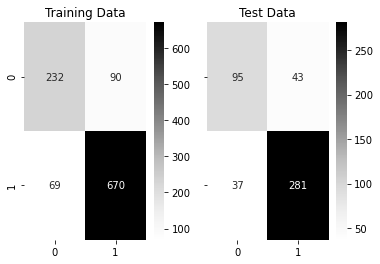

In [113]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)


plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict4)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict4)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [114]:
pred_prob_train5 = ADB_model.predict_proba(X_train)

pred_prob_test5 = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.911
AUC for the Test Data: 0.897


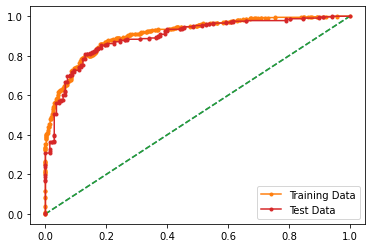

In [115]:
auc = metrics.roc_auc_score(y_train,pred_prob_train5[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train5[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test5[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test5[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model=GradientBoostingClassifier(random_state=1)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [117]:
y_train_predict5 = GBC_model.predict(X_train)
GBC_model_score = GBC_model.score(X_train, y_train)
print(GBC_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict5))
print(metrics.classification_report(y_train, y_train_predict5))

0.8925541941564562
[[256  66]
 [ 48 691]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       322
           1       0.91      0.94      0.92       739

    accuracy                           0.89      1061
   macro avg       0.88      0.87      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [118]:
y_test_predict5 = GBC_model.predict(X_test)
GBC_model_score = GBC_model.score(X_test, y_test)
print(GBC_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict5))
print(metrics.classification_report(y_test, y_test_predict5))

0.8333333333333334
[[ 98  40]
 [ 36 282]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       138
           1       0.88      0.89      0.88       318

    accuracy                           0.83       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



In [119]:
pred_prob_train6 = GBC_model.predict_proba(X_train)

pred_prob_test6 = GBC_model.predict_proba(X_test)

AUC for the Training Data: 0.954
AUC for the Test Data: 0.890


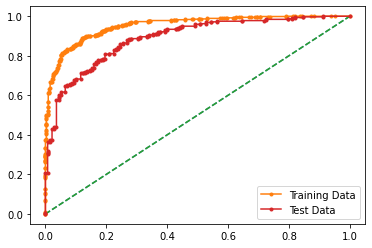

In [120]:
auc = metrics.roc_auc_score(y_train,pred_prob_train6[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train6[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test6[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test6[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Problem 2:

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

## President Franklin D. Roosevelt in 1941
## President John F. Kennedy in 1961
## President Richard Nixon in 1973
## (Hint: use .words(), .raw(), .sent() for extracting counts)

## 2.1 Find the number of characters, words, and sentences for the mentioned documents. – 3 Marks

## 2.2 Remove all the stopwords from all three speeches. – 3 Marks

## 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks

## 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session ]

In [121]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
S1= inaugural.raw('1941-Roosevelt.txt')
S1

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Rhea\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [123]:
S2=inaugural.raw('1961-Kennedy.txt')
S2

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [124]:
S3=inaugural.raw('1973-Nixon.txt')
S3

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [125]:
inaugural.words('1941-Roosevelt.txt')

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [126]:
inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [127]:
inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [128]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [129]:
inaugural.sents('1961-Kennedy.txt')

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [130]:
inaugural.sents('1973-Nixon.txt')

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [131]:
len(S1)

7571

In [132]:
len(S2)

7618

In [133]:
len(S3)

9991

In [134]:
len(inaugural.words('1941-Roosevelt.txt'))

1536

In [135]:
len(inaugural.words('1961-Kennedy.txt'))

1546

In [136]:
len(inaugural.words('1973-Nixon.txt'))

2028

In [137]:
len(inaugural.sents('1941-Roosevelt.txt'))

68

In [138]:
len(inaugural.sents('1961-Kennedy.txt'))

52

In [139]:
len(inaugural.sents('1973-Nixon.txt'))

69

In [140]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [141]:
stemmer = SnowballStemmer("english")

In [142]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens

In [143]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [144]:
len(stopwords)

211

In [145]:
res1 = re.sub(r'[^\w\s]', '', S1)

In [146]:
res1

'On each national day of inauguration since 1789 the people have renewed their sense of dedication to the United States\n\nIn Washingtons day the task of the people was to create and weld together a nation\n\nIn Lincolns day the task of the people was to preserve that Nation from disruption from within\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without\n\nTo us there has come a time in the midst of swift happenings to pause for a moment and take stock  to recall what our place in history has been and to rediscover what we are and what we may be If we do not we risk the real peril of inaction\n\nLives of nations are determined not by the count of years but by the lifetime of the human spirit The life of a man is threescore years and ten a little more a little less The life of a nation is the fullness of the measure of its will to live\n\nThere are men who doubt this There are men who believe that democracy as a form of Governme

In [147]:
Speech1 = res1
words = [word for word in Speech1.split() if word.lower() not in stopwords]
new_speech1 = " ".join(words)
print(new_speech1)
print("Old length: ", len(Speech1))
print("New length: ", len(new_speech1))

national day inauguration since 1789 people renewed sense dedication United States Washingtons day task people create weld together nation Lincolns day task people preserve Nation disruption within day task people save Nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction Lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form Government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide Americans know true Eight years ago life Republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material thing

In [148]:
res2 = re.sub(r'[^\w\s]', '', S2)

In [149]:
Speech2 = res2
words = [word for word in Speech2.split() if word.lower() not in stopwords]
new_speech2 = " ".join(words)
print(new_speech2)
print("Old length: ", len(Speech2))
print("New length: ", len(new_speech2))

Vice President Johnson Mr Speaker Mr Chief Justice President Eisenhower Vice President Nixon President Truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn Almighty God solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand God dare forget today heirs first revolution Let word go forth time place friend foe alike torch passed new generation Americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights Nation always committed committed today home around world Let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival s

In [150]:
res3 = re.sub(r'[^\w\s]', '', S3)

In [151]:
Speech3 = res3
words = [word for word in Speech3.split() if word.lower() not in stopwords]
new_speech3 = " ".join(words)
print(new_speech3)
print("Old length: ", len(Speech3))
print("New length: ", len(new_speech3))

Mr Vice President Mr Speaker Mr Chief Justice Senator Cook Mrs Eisenhower fellow citizens great good country share together met four years ago America bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace Let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad Let us resolve become time great responsibilities greatly borne renew spirit promise America enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions Peking Moscow able establish base new durable pattern relationships among nations world Americas bold initiatives 1972 long remembered year greatest progress since end World War II toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations 

In [152]:
len(new_speech1.split())

627

In [153]:
len(new_speech2.split())

693

In [154]:
len(new_speech3.split())

833

In [155]:
nltk.FreqDist(new_speech1.split()).most_common(3)

[('know', 10), ('spirit', 9), ('us', 8)]

In [156]:
nltk.FreqDist(new_speech2.split()).most_common(3)

[('us', 12), ('world', 8), ('Let', 8)]

In [157]:
nltk.FreqDist(new_speech3.split()).most_common(3)

[('us', 26), ('peace', 19), ('new', 15)]

In [158]:
!pip install wordcloud

In [159]:
import wordcloud

In [160]:
from wordcloud import WordCloud

In [161]:
word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(new_speech1)

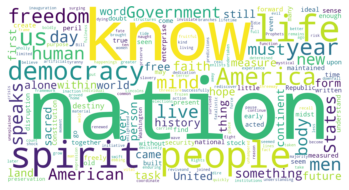

In [162]:
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [163]:
word_cloud2 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(new_speech2)

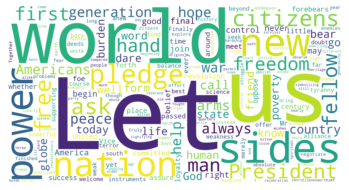

In [164]:
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [165]:
word_cloud3 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(new_speech3)

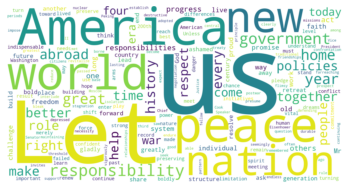

In [166]:
plt.imshow(word_cloud3, interpolation='bilinear')
plt.axis("off")
plt.show()